(-0.5, 1.5)

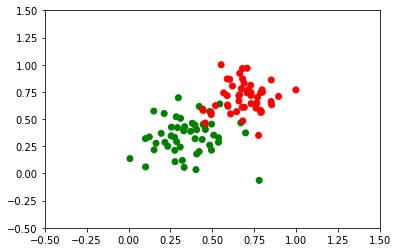

In [49]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#---------read data------------
data = np.loadtxt('data.csv', delimiter=",")
x = data[:,0]
y = data[:,1]
label = data[:,2]
colors = ['red','green']
#-------------------------------


#---------plot figure-------------
plt.scatter(x, y, c=label, cmap=ListedColormap(colors))
plt.xlim(-0.5, 1.5)  
plt.ylim(-0.5, 1.5)  
#---------------------------------

In [50]:
import numpy as np
W = np.array(np.random.rand(2,1))
X = data[:,0:2]
np.random.rand(1)[0]

0.15599452033620265

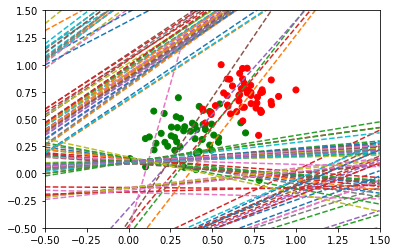

In [51]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    (q,w) = X.shape
    for i in range(0,q):
       
        pred = prediction(X[i],W,b)
        if pred != y[i]:
            if pred == 1:
                W = W - X[i].reshape(2,1) * learn_rate
                b = b - learn_rate
            else:
                W = W + X[i].reshape(2,1) * learn_rate
                b = b + learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 200):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        
    return boundary_lines

def plotLine(slope, intercept):
   
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    
    plt.plot(x_vals, y_vals, '--')
    

a = trainPerceptronAlgorithm(X,y)

plt.scatter(x, y, c=label, cmap=ListedColormap(colors))
plt.xlim(-0.5, 1.5)  
plt.ylim(-0.5, 1.5)  

# plotLine(1,1)

for i in range(0, len(a)):
    (arr1,arr2) = a[i]
    plotLine(arr1[0],arr2[0])